Installing packages and loading data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

data = pd.read_excel(r'ipad-final.xlsx')
df1 = pd.DataFrame(data)
print(df1)

             SessionId (iPad identifier)   Contacts  Group    AGE  Gender  \
0   DED6E759-F3EC-4990-894B-BF9BE45880C5   LA002_TD    1.0  10.46     1.0   
1   3E7BFEE1-01E4-4CE1-B500-1DA74CCF3EA4   LA021_TD    1.0   9.37     1.0   
2   AB5C1919-3241-45E6-9B36-A8BE9B669EB4   LA022_TD    1.0  12.79     1.0   
3   7ABD85F5-67A8-4840-AC48-DB2192FBDFDA   LA023_TD    1.0  11.62     1.0   
4   C85938E3-4F03-4BA8-A50C-E04E155427AE   LA036_TD    1.0  11.18     1.0   
5   A3768189-D4AC-499D-B368-CC07877B01AF   LA038_TD    1.0  10.46     2.0   
6   85E896CB-5A69-4306-B7F8-B5A5F0171A94   LA043_TD    1.0  11.69     1.0   
7   34F616C7-6024-4BB4-80DC-2F59B79C54BC   LA046_TD    1.0  13.86     1.0   
8   43BAC3A1-BF1B-456A-9628-1892E72DCEFB   LA048_TD    1.0  11.41     1.0   
9   91DE188F-CB8B-4B4B-AA70-777C3742F513   LA051_TD    1.0   9.13     1.0   
10  6D43F7BA-0DBA-4862-B20C-D62E65A50E9B   LA054_TD    1.0  10.37     2.0   
11  B4FACABE-E90B-4F5C-8D1E-E43F210F24DB   LA055_TD    1.0  10.78     1.0   

In [22]:
list(df1.columns)

['SessionId (iPad identifier)',
 'Contacts',
 'Group',
 'AGE',
 'Gender',
 'Dual Diagnosis',
 'Conners',
 'iqscores_verbiq',
 'iqscores_perfiq',
 'iqscores_full4iq',
 'iqscores_full2iq',
 'manual_dexterity_stand',
 'aim_catch_standard',
 'balance_standard',
 'total_standard',
 'Praxis_Total_Correct_GTC',
 'Praxis_Total_Correct_IMI',
 'Praxis_Total_Correct_TU',
 'Praxis_Total_Correct_ML',
 'Praxis_Total_Correct_MF',
 'DirectnessIndexStdDev',
 'GesturesAreaStdDev',
 'GesturesAccelerationMin',
 'AttitudeStdDev_x',
 'ipad_behavior',
 'ipad_motivation',
 'ipad_motor',
 'ipad_date',
 'video blurred (Y/N)']

## Important step!
Remove bottom 4 rows with mean and std comparisons, because they cause NA
Convert variables to float, but remove datetime

In [2]:
df1 = df1.drop(columns=["ipad_date","SessionId (iPad identifier)","Contacts", "ipad_behavior", "ipad_motivation", "video blurred (Y/N)", "ipad_motor"])
df1 =df1.drop(df1.index[54:59])
df1 = df1.astype(float)

In [50]:
print(df1.mean())

Group                           1.925926
AGE                            12.163148
Gender                          1.277778
Dual Diagnosis                  0.296296
Conners                        66.777778
iqscores_verbiq               113.314815
iqscores_perfiq               109.407407
iqscores_full4iq              112.518519
iqscores_full2iq              112.962963
manual_dexterity_stand          6.777778
aim_catch_standard              8.111111
balance_standard                7.685185
total_standard                  6.722222
Praxis_Total_Correct_GTC        0.631111
Praxis_Total_Correct_IMI        0.546078
Praxis_Total_Correct_TU         0.685229
Praxis_Total_Correct_ML         0.477078
Praxis_Total_Correct_MF         0.602037
DirectnessIndexStdDev         112.536887
GesturesAreaStdDev          18173.208512
GesturesAccelerationMin         0.727429
AttitudeStdDev_x                0.009833
dtype: float64


In [51]:
print(df1.std())

Group                          0.820765
AGE                            2.260747
Gender                         0.452109
Dual Diagnosis                 0.460911
Conners                       19.885205
iqscores_verbiq               16.838662
iqscores_perfiq               18.699731
iqscores_full4iq              16.819509
iqscores_full2iq              15.985799
manual_dexterity_stand         3.390701
aim_catch_standard             3.898072
balance_standard               3.484868
total_standard                 3.455467
Praxis_Total_Correct_GTC       0.150090
Praxis_Total_Correct_IMI       0.172817
Praxis_Total_Correct_TU        0.153927
Praxis_Total_Correct_ML        0.221804
Praxis_Total_Correct_MF        0.175148
DirectnessIndexStdDev         27.969736
GesturesAreaStdDev          9202.134527
GesturesAccelerationMin        0.718426
AttitudeStdDev_x               0.028685
dtype: float64


In [7]:
df1.value_counts('Group', 'Gender')

Group
1.0    0.370370
2.0    0.333333
3.0    0.296296
dtype: float64

## Normality tests
Group/Gender - type of diagnosis distributed by gender frequencies

In [8]:
pyplot.hist(data)
pyplot.show()
df1.groupby(["Group", "Gender"]).size()

Group  Gender
1.0    1.0       14
       2.0        6
2.0    1.0       16
       2.0        2
3.0    1.0        9
       2.0        7
dtype: int64

Normality check

array([[<AxesSubplot:title={'center':'DirectnessIndexStdDev'}>]],
      dtype=object)

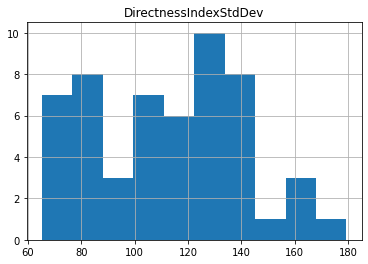

In [52]:
df1.hist(column='DirectnessIndexStdDev')

In [20]:
df1.dtypes

SessionId (iPad identifier)            object
Contacts                               object
Group                                 float64
AGE                                   float64
Gender                                float64
Dual Diagnosis                        float64
Conners                               float64
iqscores_verbiq                       float64
iqscores_perfiq                       float64
iqscores_full4iq                      float64
iqscores_full2iq                      float64
manual_dexterity_stand                float64
aim_catch_standard                    float64
balance_standard                      float64
total_standard                        float64
Praxis_Total_Correct_GTC              float64
Praxis_Total_Correct_IMI              float64
Praxis_Total_Correct_TU               float64
Praxis_Total_Correct_ML               float64
Praxis_Total_Correct_MF                object
DirectnessIndexStdDev                  object
GesturesAreaStdDev                

# Kolmogorov-Smirnov test for non-parametric data

In [4]:
import scipy.stats as stats

for i in df1.columns:
    print([i])
    a,b = stats.kstest(df1[[i]], 'norm')
    print("Statistics", a, "p-value", b)
    if b < .05:
        print("The null hypothesis can be rejected.")
    else:
        print("The null hypothesis cannot be rejected")

['Group']
Statistics 0.9986501019683699 p-value 2.1741127126027457e-155
The null hypothesis can be rejected.
['AGE']
Statistics 1.0 p-value 0.0
The null hypothesis can be rejected.
['Gender']
Statistics 0.9772498680518208 p-value 3.7858348787750895e-89
The null hypothesis can be rejected.
['Dual Diagnosis']
Statistics 0.8413447460685429 p-value 1.924184384986083e-43
The null hypothesis can be rejected.
['Conners']
Statistics 1.0 p-value 0.0
The null hypothesis can be rejected.
['iqscores_verbiq']
Statistics 1.0 p-value 0.0
The null hypothesis can be rejected.
['iqscores_perfiq']
Statistics 1.0 p-value 0.0
The null hypothesis can be rejected.
['iqscores_full4iq']
Statistics 1.0 p-value 0.0
The null hypothesis can be rejected.
['iqscores_full2iq']
Statistics 1.0 p-value 0.0
The null hypothesis can be rejected.
['manual_dexterity_stand']
Statistics 1.0 p-value 0.0
The null hypothesis can be rejected.
['aim_catch_standard']
Statistics 1.0 p-value 0.0
The null hypothesis can be rejected.
['

## Shapiro-Wilk test

In [6]:
for i in df1.columns:
    print([i])
    a,b = stats.shapiro(df1[[i]])
    print("Statistics", a, "p-value", b)
    if b < .05:
        print("The null hypothesis can be rejected.")
    else:
        print("The null hypothesis cannot be rejected")

['Group']
Statistics 0.7916952967643738 p-value 2.596257502318622e-07
The null hypothesis can be rejected.
['AGE']
Statistics 0.9551528692245483 p-value 0.04190027341246605
The null hypothesis can be rejected.
['Gender']
Statistics 0.5606359243392944 p-value 1.821582294725399e-11
The null hypothesis can be rejected.
['Dual Diagnosis']
Statistics 0.5734165906906128 p-value 2.788299972855679e-11
The null hypothesis can be rejected.
['Conners']
Statistics 0.7973853349685669 p-value 3.52963638761139e-07
The null hypothesis can be rejected.
['iqscores_verbiq']
Statistics 0.9795827865600586 p-value 0.48272350430488586
The null hypothesis cannot be rejected
['iqscores_perfiq']
Statistics 0.9730361104011536 p-value 0.261368066072464
The null hypothesis cannot be rejected
['iqscores_full4iq']
Statistics 0.968917191028595 p-value 0.17266787588596344
The null hypothesis cannot be rejected
['iqscores_full2iq']
Statistics 0.9583722949028015 p-value 0.058270085602998734
The null hypothesis cannot be

In [7]:
df2 = df1.groupby('Group')
df2.first()

,AGE,Gender,Dual Diagnosis,Conners,iqscores_verbiq,iqscores_perfiq,iqscores_full4iq,iqscores_full2iq,manual_dexterity_stand,aim_catch_standard,...,total_standard,Praxis_Total_Correct_GTC,Praxis_Total_Correct_IMI,Praxis_Total_Correct_TU,Praxis_Total_Correct_ML,Praxis_Total_Correct_MF,DirectnessIndexStdDev,GesturesAreaStdDev,GesturesAccelerationMin,AttitudeStdDev_x
Group,,,,,,,,,,,,,,,,,,,,,
1.0,10.46,1.0,0.0,45.0,113.0,117.0,118.0,107.0,8.0,11.0,...,10.0,0.68,0.63,0.94,0.63,0.63,124.023336,17859.05922,1.644520,0.000866
2.0,11.10,1.0,1.0,90.0,85.0,63.0,72.0,75.0,1.0,8.0,...,1.0,0.52,0.21,0.29,0.11,0.24,123.906827,35854.91724,3.156906,0.000702
3.0,12.21,1.0,0.0,90.0,105.0,79.0,91.0,94.0,2.0,10.0,...,5.0,0.50,0.44,0.71,0.22,0.60,100.496485,16658.15334,0.700550,0.000593


In [10]:
td_data = df2.get_group(1)
asd_data = df2.get_group(2)
dcd_data = df2.get_group(3)

In [16]:
for i in td_data.columns:
    print([i])
    a,b = stats.kstest(td_data[[i]], 'norm')
    print("Statistics", a, "p-value", b)
    if b < .05:
        print("The null hypothesis can be rejected.")
    else:
        print("The null hypothesis cannot be rejected")

['Group']
Statistics 0.8413447460685429 p-value 2.205430306931295e-16
The null hypothesis can be rejected.
['AGE']
Statistics 1.0 p-value 0.0
The null hypothesis can be rejected.
['Gender']
Statistics 0.9772498680518208 p-value 2.758724887582737e-33
The null hypothesis can be rejected.
['Dual Diagnosis']
Statistics 0.5 p-value 3.787595240539032e-05
The null hypothesis can be rejected.
['Conners']
Statistics 1.0 p-value 0.0
The null hypothesis can be rejected.
['iqscores_verbiq']
Statistics 1.0 p-value 0.0
The null hypothesis can be rejected.
['iqscores_perfiq']
Statistics 1.0 p-value 0.0
The null hypothesis can be rejected.
['iqscores_full4iq']
Statistics 1.0 p-value 0.0
The null hypothesis can be rejected.
['iqscores_full2iq']
Statistics 1.0 p-value 0.0
The null hypothesis can be rejected.
['manual_dexterity_stand']
Statistics 1.0 p-value 0.0
The null hypothesis can be rejected.
['aim_catch_standard']
Statistics 1.0 p-value 0.0
The null hypothesis can be rejected.
['balance_standard']

## Mann Whitney U Test - Test1

In [11]:
import scipy.stats as stats
import researchpy as rp

stats.mannwhitneyu(td_data['DirectnessIndexStdDev'], asd_data['DirectnessIndexStdDev'], alternative='two-sided')

MannwhitneyuResult(statistic=228.0, pvalue=0.16493153959832263)

## Independent t-test

In [12]:
stats.ttest_ind(df1['DirectnessIndexStdDev'][df1['Group'] == 1],
                df1['DirectnessIndexStdDev'][df1['Group'] == 2])

Ttest_indResult(statistic=1.4531321612262005, pvalue=0.1548490683738569)

In [13]:
stats.ttest_ind(df1['GesturesAccelerationMin'][df1['Group'] == 1],
                df1['GesturesAccelerationMin'][df1['Group'] == 2])

Ttest_indResult(statistic=-2.257248116275918, pvalue=0.030155800022168406)